In [99]:
# Usual tools
%matplotlib inline
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics         import roc_curve

# Plot settings
import matplotlib as mpl
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5

## Prepare dataset

The used dataset describe flight delay depending on the airport origin, the day of the week, the month of the year etc ... A binary target is built knowing whether a flight was delayed or not (defined as delay>10min)

In [32]:
data          = pd.read_csv("data/training.csv")
binary_target = (data['ARRIVAL_DELAY'] > 10) * 1
data = data.drop('ARRIVAL_DELAY',axis=1)
data.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_ID,FLIGHT_NUMBER_ID,TAIL_NUMBER_ID,ORIGIN_AIRPORT_ID,DESTINATION_AIRPORT_ID,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL
0,9,26,6,4,4429,70,683,637,620,468,806
1,8,27,4,13,139,1629,571,722,1705,991,1845
2,10,4,7,7,3185,2041,214,2,2010,1118,2220
3,4,22,3,5,742,4284,571,725,1229,602,1320
4,12,9,3,0,1626,1326,572,537,1830,1217,2222


In [33]:
# take small part of the data
small_data = data[::20]
small_binary_target = binary_target[::20]
print (len(small_data))

# cross validation samples preparing
trainX, testX, trainY, testY = train_test_split(small_data, small_binary_target, random_state=42, train_size=0.5)

24994


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


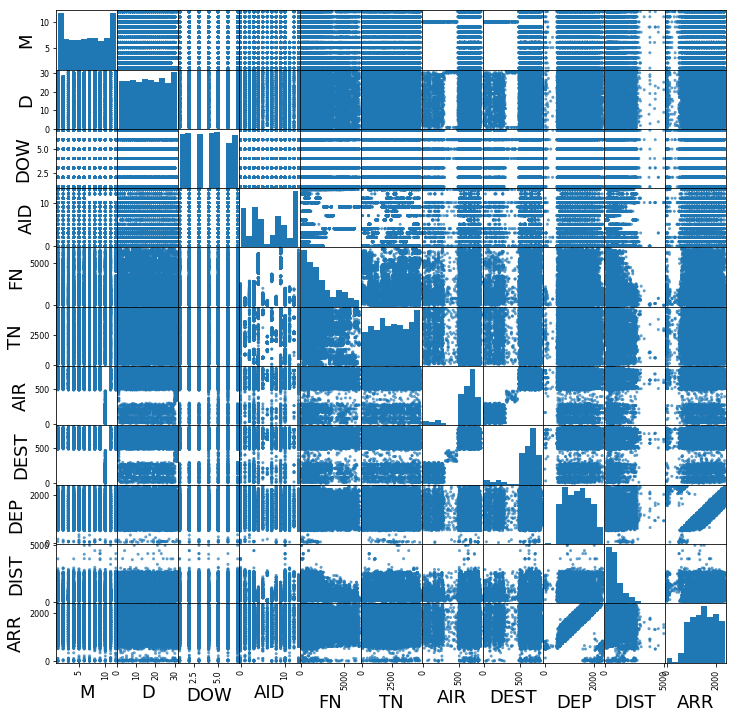

In [48]:
# Quickly look at correlations between variables
trainX_shortname = pd.DataFrame(trainX)
trainX_shortname.columns=['M','D','DOW','AID','FN','TN','AIR','DEST','DEP','DIST','ARR']
pd.plotting.scatter_matrix(trainX_shortname, figsize=(12,12), alpha=0.7, diagonal='hist')
plt.draw()

## Classifier and regressor

In [69]:
# Train a random forest
rf_class = RandomForestClassifier(n_estimators=500).fit(trainX, trainY)
rf_regre = RandomForestRegressor (n_estimators=500).fit(trainX, trainY)

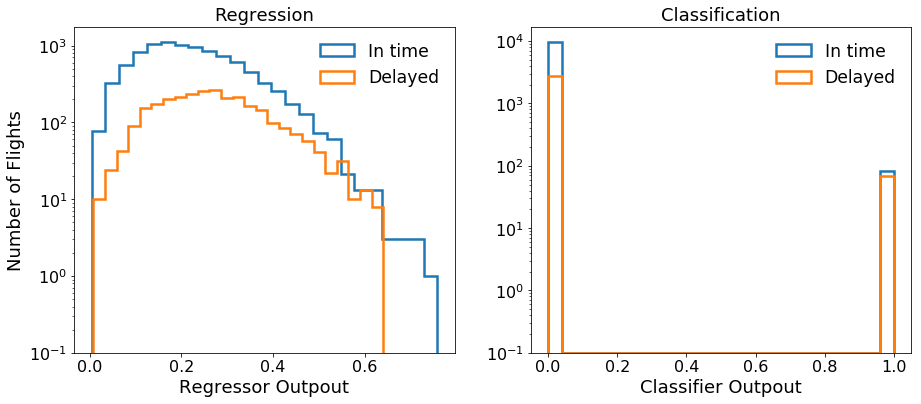

In [97]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Regression')
plt.hist( rf_regre.predict(testX[testY==0]) ,bins=25, histtype='step', label='In time', linewidth=2.5, log=True)
plt.hist( rf_regre.predict(testX[testY>0])  ,bins=25, histtype='step', label='Delayed', linewidth=2.5, log=True)
plt.ylabel('Number of Flights')
plt.xlabel('Regressor Outpout')
plt.legend()

plt.subplot(122)
plt.title('Classification')
plt.hist( rf_class.predict(testX[testY==0]) ,bins=25, histtype='step', label='In time', linewidth=2.5, log=True)
plt.hist( rf_class.predict(testX[testY>0])  ,bins=25, histtype='step', label='Delayed', linewidth=2.5, log=True)
plt.xlabel('Classifier Outpout')
plt.legend()

### ROC curve

ROC curve means Receiver Operating Characteristics. A build in function in scikit learn allow to get it in two line of codes.

In [106]:
TrueLabel = testY
Variable  = rf_regre.predict(testX)

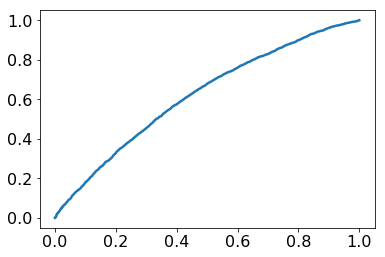

In [107]:
# once the flag and variable on which you cut is ready ...
fpr,tpr,_ = roc_curve(TrueLabel,Variable)
plt.plot(fpr,tpr)